Lambda School Data Science

*Unit 4, Sprint 2, Module 2*

---

# Train (Prepare)
__*Neural Network Foundations*__

## Learning Objectives
* <a href="#p1">Part 1</a>: Student should be able to explain the intuition behind backpropagation and gradient descent
* <a href="#p2">Part 2</a>: Student should be able to discuss the importance of batch size
* <a href="#p3">Part 3</a>: Student should be able to discuss the importance of learning rate

## Summary of Yesterday

Yesterday, we learned about some of the principal components of Neural Networks: Neurons, Weights, Activation Functions, and layers (input, output, & hidden). Today, we will reinforce our understanding of those components and introduce the mechanics of training a neural network. Feed-forward neural networks, such as multi-layer perceptrons (MLPs), are almost always trained using some variation of gradient descent where the gradient has been calculated by backpropagation.

  <center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_0167.jpeg" width=400></center>

- There are three kinds of layers: input, hidden, and output layers.
- Each layer is made up of **n** individual neurons (aka activation units) which have a corresponding weight and bias.
- Signal is passed from layer to layer through a network by:
 - Taking in inputs from the training data (or previous layer)
 - Multiplying each input by its corresponding weight (think arrow/connecting line)
 - Adding a bias to this weighted some of inputs and weights
 - Activating this weighted sum + bias by squishifying it with sigmoid or some other activation function. With a single perceptron with three inputs, calculating the output from the node is done like so:
\begin{align}
 y = sigmoid(\sum(weight_{1}input_{1} + weight_{2}input_{2} + weight_{3}input_{3}) + bias)
\end{align}
 - this final activated value is the signal that gets passed onto the next layer of the network.
 

## Training a Neural Network: *Formal Summary*

0. Pick a network architecture
   - No. of input units = No. of features
   - No. of output units = Number of Classes (or expected targets)
   - Select the number of hidden layers and number of neurons within each hidden layer
1. Randomly initialize weights
2. Implement forward propagation to get $h_{\theta}(x^{(i)})$ for any $x^{(i)}$
3. Implement code to compute a cost function $J(\theta)$
4. Implement backpropagation to compute partial derivatives $\frac{\delta}{\delta\theta_{jk}^{l}}{J(\theta)}$
5. Use gradient descent (or other advanced optimizer) with backpropagation to minimize $J(\theta)$ as a function of parameters $\theta\$
6. Repeat steps 2 - 5 until cost function is 'minimized' or some other stopping criteria is met. One pass over steps 2 - 5 is called an iteration or epoch.

# Backpropagation & Gradient Descent (Learn)
<a id="p1"></a>

## Overview

Backpropagation is short for ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation) and refers to a specific (rather calculus intensive) algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch. Our purpose today is to demonstrate the backpropagation algorithm on a simple Feedforward Neural Network and in so doing help you get a grasp on the main process. If you want to understand all of the underlying calculus of how the gradients are calculated then you'll need to dive into it yourself, [3Blue1Brown's video is a great starting place](https://www.youtube.com/watch?v=tIeHLnjs5U8). I also highly recommend this Welch Labs series [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) if you want a rapid yet orderly walk through of the main intuitions and math behind the backpropagation algorithm. 

### What is a Gradient?

> In vector calculus, the gradient is a multi-variable generalization of the derivative. 

The gradients that we will deal with today will be vector representations of the derivative of the activation function. 

## Follow Along

In this section, we will again a simple neural network using base TensorFlow. We'll focus on using a __Feed Forward Neural Network__ to predict test scores. 

<center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_99C94113202D-1.jpeg"width=500></center>

### Generate some Fake Data

In [1]:
import tensorflow as tf

# Imagine that our data is drawn from a linear function
# y = 3*hours_studying + 50

TRUE_W = 3.5
TRUE_b = 50.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

outputs = inputs * TRUE_W + TRUE_b + noise

In [2]:
inputs[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 0.22214648, -1.0475451 , -1.8344976 ,  1.0850646 ,  0.40536332],
      dtype=float32)>

In [ ]:
noise[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.5452991 , -0.81521344,  1.9958404 , -0.80046517,  0.5429737 ],
      dtype=float32)>

In [3]:
outputs[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([50.306377, 45.961063, 43.23612 , 53.686436, 51.91077 ],
      dtype=float32)>

### Loss Function
Here we will use Mean Squared Error (MSE), because this is a regression problem. We are trying to predict a continuous target.

In [4]:
def loss(target_y, predicted_y):
  "MSE"
  return tf.reduce_mean(tf.square(target_y - predicted_y))

### Neural Network Architecture
Lets create a Neural Network class called "Model" to contain this functionality. Note: This is essentially a linear regression whose coefficients are trained by gradient descent. In practice, gradient descent works on much more complex function like the multi-layer networks we constructed yesterday.

In [5]:
class Model(object):

  def __init__(self):
    self.W = tf.Variable(8.0)
    self.b = tf.Variable(40.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 64.0

In [6]:
model(3.0).numpy()

64.0

### Initial Weights
The initial weights in our model were arbitrary. In practice, weights are initialized randomly. 

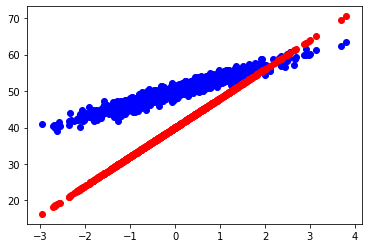

Current loss: 123.817055


In [7]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

### Update Weights Based on Gradient

> *Assigning blame for bad predictions and delivering justice - repeatedly and a little bit at a time*

You should also know that with neural networks it is common to have gradients that are not convex (like what we saw when we applied gradient descent to linear regression). 

Due to the high complexity of these models and their nonlinearity, it is common for gradient descent to get stuck in a local minimum, but there are ways to combat this:

1) Stochastic Gradient Descent

2) More advanced Gradient-Descent-based "Optimizers" - See Stretch Goals on assignment.

In [8]:
 def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t: 
     current_loss = loss(outputs, model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

### Train the Network

In [9]:
model = Model()

# Store Some history of weights
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=8.00 b=40.00 loss=123.81705
Epoch  1: W=6.98 b=42.00 loss=78.68258
Epoch  2: W=6.19 b=43.60 loss=50.16438
Epoch  3: W=5.58 b=44.88 loss=32.13263
Epoch  4: W=5.11 b=45.90 loss=20.72380
Epoch  5: W=4.75 b=46.72 loss=13.50077
Epoch  6: W=4.46 b=47.37 loss=8.92502
Epoch  7: W=4.24 b=47.90 loss=6.02464
Epoch  8: W=4.08 b=48.32 loss=4.18520
Epoch  9: W=3.94 b=48.65 loss=3.01801


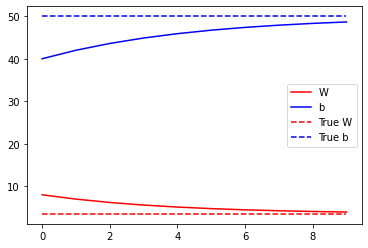

In [10]:
import matplotlib.pyplot as plt

plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

## Challenge

In the module project, you will be asked to explain the logic of backpropagation and gradient descent.

# Batch Size (Learn)

## Overview

The What - Stochastic Gradient Descent calculates an approximation of the gradient over the entire dataset by reviewing the predictions of a random sample. 

The Why - *Speed*. Calculating the gradient over the entire dataset is extremely expensive computationally. 

### Batch Size
Batches are the number of observations our model is shown to make predictions and update the weights. Batches are selected randomly during epoch. All observations are considered when passing thru an epoch at some point.

* Smaller Batch = Slower Run Time (but maybe more accurate results)
* Default Batch = Balance between speed and accuracy
* Large Batch = Very fast, but not nearly as accurate.

### Baseline Model

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Our Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def create_model(lr=.01):
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
mnist_model = create_model()
dir(mnist_model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

In [ ]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
32 * 784  # Pretty close to # of parameters, there's also bias etc.

25088

## Follow Along
Let's run a series of experiments for a default, small, and large batch size.

### Default
Batch Size is 32

In [ ]:
mnist_model_32 = create_model()

bt_default = mnist_model_32.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7712 - accuracy: 0.7817 - val_loss: 0.3668 - val_accuracy: 0.8938
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3349 - accuracy: 0.9029 - val_loss: 0.2924 - val_accuracy: 0.9153
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2789 - accuracy: 0.9188 - val_loss: 0.2508 - val_accuracy: 0.9262
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2448 - accuracy: 0.9297 - val_loss: 0.2239 - val_accuracy: 0.9346
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2205 - accuracy: 0.9361 - val_loss: 0.2074 - val_accuracy: 0.9401
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2021 - accuracy: 0.9412 - val_loss: 0.1929 - val_accuracy: 0.9425
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1881 - accuracy: 0.9452 - val_loss: 0.1847 - val_accuracy:

### Small Batch Size
Batch Size is 8

In [ ]:
mnist_model_8 = create_model()

bt_small = mnist_model_8.fit(X_train, y_train,
                             # Hyperparameters!
                             epochs=25,
                             batch_size=8,
                             validation_data=(X_test, y_test))

Epoch 1/25
7500/7500 [==============================] - 19s 2ms/step - loss: 0.4235 - accuracy: 0.8780 - val_loss: 0.2389 - val_accuracy: 0.9309
Epoch 2/25
7500/7500 [==============================] - 18s 2ms/step - loss: 0.2146 - accuracy: 0.9378 - val_loss: 0.1737 - val_accuracy: 0.9462
Epoch 3/25
7500/7500 [==============================] - 19s 2ms/step - loss: 0.1679 - accuracy: 0.9504 - val_loss: 0.1515 - val_accuracy: 0.9543
Epoch 4/25
7500/7500 [==============================] - 19s 2ms/step - loss: 0.1397 - accuracy: 0.9592 - val_loss: 0.1269 - val_accuracy: 0.9608
Epoch 5/25
7500/7500 [==============================] - 18s 2ms/step - loss: 0.1217 - accuracy: 0.9641 - val_loss: 0.1120 - val_accuracy: 0.9649
Epoch 6/25
7500/7500 [==============================] - 18s 2ms/step - loss: 0.1082 - accuracy: 0.9681 - val_loss: 0.1109 - val_accuracy: 0.9665
Epoch 7/25
7500/7500 [==============================] - 19s 2ms/step - loss: 0.0973 - accuracy: 0.9712 - val_loss: 0.1201 - val_ac

### Large Batch Size
Batch Size is 512

In [ ]:
mnist_model_512 = create_model()

bt_large = mnist_model_512.fit(X_train, y_train,
                               # Hyperparameters!
                               epochs=25,
                               batch_size=512,
                               validation_data=(X_test, y_test))

Epoch 1/25
118/118 [==============================] - 1s 5ms/step - loss: 2.1799 - accuracy: 0.2145 - val_loss: 2.0129 - val_accuracy: 0.3813
Epoch 2/25
118/118 [==============================] - 0s 4ms/step - loss: 1.8110 - accuracy: 0.5088 - val_loss: 1.5616 - val_accuracy: 0.6192
Epoch 3/25
118/118 [==============================] - 0s 4ms/step - loss: 1.3592 - accuracy: 0.6718 - val_loss: 1.1269 - val_accuracy: 0.7206
Epoch 4/25
118/118 [==============================] - 0s 4ms/step - loss: 0.9996 - accuracy: 0.7422 - val_loss: 0.8452 - val_accuracy: 0.7811
Epoch 5/25
118/118 [==============================] - 0s 4ms/step - loss: 0.7862 - accuracy: 0.7903 - val_loss: 0.6861 - val_accuracy: 0.8207
Epoch 6/25
118/118 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.8256 - val_loss: 0.5901 - val_accuracy: 0.8481
Epoch 7/25
118/118 [==============================] - 0s 4ms/step - loss: 0.5809 - accuracy: 0.8481 - val_loss: 0.5251 - val_accuracy: 0.8646
Epoch 

### Visualization of Results

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["32_", "8_", "512_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.771188,0.781717,0.366844,0.8938,0,32_
1,0.334926,0.902917,0.292404,0.9153,1,32_
2,0.278943,0.918800,0.250760,0.9262,2,32_
3,0.244804,0.929717,0.223867,0.9346,3,32_
4,0.220540,0.936100,0.207430,0.9401,4,32_


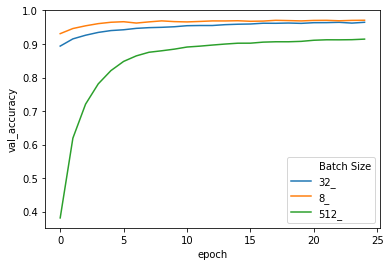

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

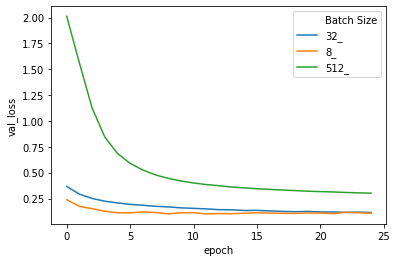

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

## Challenge

You will be expected to experiment with batch size on today's assignment.

# Learning Rate (Learn)

## Overview

Learning Rate controls the size of the update to our weights that the optimization algorithm makes. VERY IMPORTANT hyperparameter.

* Too high of a learning rate causes unstable results
* Too Low of a learning rate the model will underfit
* Goldilocks parameters - it needs be "just right"
* Scale of 0-1

## Follow Along

Same experiment with Batch but different learning rates:
* High Learning = .75
* Default Learning = .01
* Low Learning Rate = .0001

### Default Learning Rate

In [ ]:
# Running with 10 for time, feel free to rerun with 25 to make nicer plots
lr_default = create_model().fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7786 - accuracy: 0.7801 - val_loss: 0.3774 - val_accuracy: 0.8909
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3440 - accuracy: 0.9003 - val_loss: 0.3036 - val_accuracy: 0.9108
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2890 - accuracy: 0.9167 - val_loss: 0.2605 - val_accuracy: 0.9260
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2552 - accuracy: 0.9267 - val_loss: 0.2366 - val_accuracy: 0.9330
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2280 - accuracy: 0.9338 - val_loss: 0.2139 - val_accuracy: 0.9366
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2057 - accuracy: 0.9411 - val_loss: 0.1931 - val_accuracy: 0.9436
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1876 - accuracy: 0.9461 - val_loss: 0.1812 - val_accuracy:

### High Learning Rate

In [ ]:
lr_high = create_model(lr=.75).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0890 - accuracy: 0.5774 - val_loss: 0.6770 - val_accuracy: 0.7246
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7045 - accuracy: 0.7240 - val_loss: 0.7290 - val_accuracy: 0.7336
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7079 - accuracy: 0.7232 - val_loss: 0.7665 - val_accuracy: 0.7003
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7210 - accuracy: 0.7242 - val_loss: 0.9313 - val_accuracy: 0.6708
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6648 - accuracy: 0.7579 - val_loss: 0.6576 - val_accuracy: 0.7375
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8182 - accuracy: 0.6890 - val_loss: 0.7435 - val_accuracy: 0.7298
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1571 - accuracy: 0.5337 - val_loss: 1.3096 - val_accuracy:

### Low Learning Rate

In [ ]:
lr_low = create_model(lr=.0001).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3007 - accuracy: 0.1126 - val_loss: 2.2767 - val_accuracy: 0.1278
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2561 - accuracy: 0.1456 - val_loss: 2.2359 - val_accuracy: 0.1574
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2165 - accuracy: 0.1752 - val_loss: 2.1962 - val_accuracy: 0.1886
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1763 - accuracy: 0.2066 - val_loss: 2.1543 - val_accuracy: 0.2209
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1333 - accuracy: 0.2430 - val_loss: 2.1091 - val_accuracy: 0.2610
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0871 - accuracy: 0.2863 - val_loss: 2.0608 - val_accuracy: 0.3038
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0379 - accuracy: 0.3370 - val_loss: 2.0097 - val_accuracy:

### Visualization of Results

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_default, lr_low, lr_high], [".01_", ".0001_", ".75_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.778592,0.780150,0.377377,0.8909,0,.01_
1,0.343956,0.900300,0.303628,0.9108,1,.01_
2,0.288989,0.916733,0.260530,0.9260,2,.01_
3,0.255233,0.926683,0.236631,0.9330,3,.01_
4,0.227982,0.933783,0.213889,0.9366,4,.01_


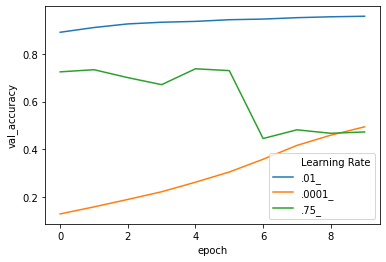

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

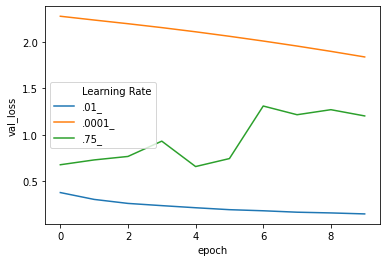

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

## Challenge

You will be expected to experiment with different learning rates today.

---